<a href="https://colab.research.google.com/github/Lucas-Lira/exploratory-data-analysis/blob/main/spotify_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de Dados – Spotify Dataset

## Especificações da Base de Dados:
   * Nome:
       * Spotify Dataset 1921-2020, 600k+ Tracks
    
   * Estrutura:
       * tracks.csv
            * Primário :
                - id (Id da trilha gerada pelo Spotify)
            * Numérico :
                - acousticness (varia de 0 a 1)
                - danceability (varia de 0 a 1)
                - energy (varia de 0 a 1)
                - duration_ms (número inteiro normalmente varia de 200k a 300k)
                - instrumentalness (varia de 0 a 1)
                - valence (varia de 0 a 1)
                - popularity (varia de 0 a 100)
                - tempo (flutuação normalmente variando de 50 a 150)
                - liveness (varia de 0 a 1)
                - loudness (flutuação tipicamente variando de -60 a 0)
                - speechiness (varia de 0 a 1)
            * Fictício:
                - mode (0 = Menor, 1 = Maior)
                - explicit (0 = sem conteúdo explícito, 1 = conteúdo explícito)
            * Categórico :
                - key (todas as chaves na oitava codificadas como valores que variam de 0 a 11, começando em C como 0, C # como 1 e assim por diante ...)
                - timesignature (a assinatura de tempo prevista, mais tipicamente 4)
                - artists (lista dos artistas mencionados)
                - artists_id (Ids dos artistas mencionados)
                - release_date (data de lançamento principalmente no formato aaaa-mm-dd, no entanto, a precisão da data pode variar)
                - name (nome da música)
       * artists.csv
           * id (id do artista)
           * name (nome do artista)
           * followers (número total de seguidores do artista)
           * popularity (popularidade de determinado artista com base em todas as suas faixas)
           * genres (gêneros associados a este artista)
       * dict_artists.json
            {
                "qualquer": [
                    "primeiro",
                    "segundo",
                    "terceiro",
                    ...,
                    "enésimo"
                ],
                "em branco": [],
                "primeiro: [
                    " qualquer ",
                    " terceiro ",
                    " segundo
                ],
                ...
            }

       * (As listas são classificadas em ordem decrescente, então "primeiro" é o mais semelhante a "qualquer" e "segundo" o segundo é mais e assim por diante... O número de artistas pode variar de 0 a 20)

   * Link de Acesso: https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks/data

## Descrição do Projeto

Este projeto tem como objetivo realizar uma análise de dados a partir de um conjunto contendo informações musicais. Durante o processo, foram adotadas algumas decisões metodológicas e técnicas específicas para garantir a consistência e a precisão dos resultados. Abaixo estão os principais pontos abordados:

## Tratamento de Dados Nulos
Optou-se por eliminar os valores nulos presentes no conjunto de dados. Outras técnicas de tratamento foram consideradas, mas acabaram sendo desconsideradas por não se adequarem ao contexto da análise.

## Manipulação da Coluna "artists"
A coluna **"artists"** apresenta vetores em seus registros, o que tornou necessário o desmembramento desses valores para garantir a precisão dos resultados. No entanto, devido ao grande volume de dados, uma enumeração completa de todos os valores da população mostrou-se inviável e extremamente demorada.

Para contornar essa limitação, optamos por utilizar uma **amostra representativa dos dados**, garantindo um tamanho manejável e que possibilite uma análise fidedigna. Nos códigos, é possível observar o uso de comandos como `.head(X)`, onde **"X"** representa o tamanho da amostra utilizada.

## Comentários no Código
Para facilitar a compreensão dos passos realizados, foram adicionados comentários explicativos nas células contendo códigos. Recomenda-se a leitura atenta desses comentários para um melhor entendimento das decisões tomadas.

## Execução do Notebook
Dependendo do tamanho do dataframe, pode ser necessário iniciar o notebook com um aumento na taxa de transferência de dados. Utilize o seguinte comando para evitar problemas de execução:

```bash
jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# TODO: Instale as dependências:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install plotly
!pip install numpy

In [ ]:
import pandas  as pd
import seaborn as sbn
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np

# Observação: Para utilizar o plotly no Jupyter é necessário instalá-lo, sendo assim, abra o anaconda prompt e execute o
# seguinte comando:
# conda install -c https://conda.anaconda.org/plotly plotly
# ou com o comando pip install plotly

import plotly.express as px

In [ ]:
artist_popularity_metrics = pd.read_csv('/content/drive/MyDrive/datasets/spotify-1921-2020-600k-tracks/artists.csv')
audio_features_of_tracks  = pd.read_csv('/content/drive/MyDrive/datasets/spotify-1921-2020-600k-tracks/tracks.csv')
# related_artists           = pd.read_json('Spotify Dataset 2021/dict_artists 1.0.json')
df_data_by_year_o         = pd.read_csv('/content/drive/MyDrive/datasets/spotify-1921-2020-600k-tracks/data_by_year.csv')

In [ ]:
artist_popularity_metrics.columns = ['id_artist', 'followers', 'genres', 'name', 'popularity']
audio_features_of_tracks.columns = ['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists', 'id_artist', 'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# Lista de Questões

Inicialmente, os dados foram tratados para verificar a presença de valores nulos nas colunas do DataFrame. Um DataFrame é uma estrutura de dados tabular usada na biblioteca Pandas para representar dados de forma organizada. A verificação de valores nulos é importante porque eles podem distorcer os resultados da análise. Para isso, o método DataFrame.isna() foi utilizado para detectar os valores nulos, seguido da função .sum() para contá-los.

In [ ]:
print(audio_features_of_tracks.isna().sum())

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artist            0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64


Nota-se na saída do código acima que a junção dos comandos nos fornece a quantidade de valores nulos separados por coluna, o que facilitou a sua correção. Conforme destacado no início do trabalho, optamos por eliminar todos os registros que possuem valores nulos. Observa-se que apenas a coluna "name" possui valores nulos, os quais serão eliminados mais adiante. Antes de prosseguir será verificado quantos registros existem no dataframe, para isso, utilizamos o comando DataFrame.shape que apresentará informações sobre a dimensionalidade do nosso dataframe.

In [ ]:
audio_features_of_tracks.shape

(586672, 20)

O Dataframe possui 586.672 registros, então vamos executar o código abaixo para eliminar os registros nulos e atribuiremos o resultado a um dataframe denominado "not_null".

In [ ]:
not_null = audio_features_of_tracks[ audio_features_of_tracks['name'].isnull() == False ]

Feito isto, executaremos o comando a seguir para verificar se os registros com valores nulos foram realmente eliminados.

In [ ]:
not_null.shape

(586601, 20)

* Nota-se a redução de 71 registros.
* Após os tratamentos desses dados, definiremos e analisaremos as questões a serem respondidas.

### 1 - Qual a tendência na duração das 100 músicas mais populares no ano de 2021?

<Axes: xlabel='duration_ms', ylabel='Count'>

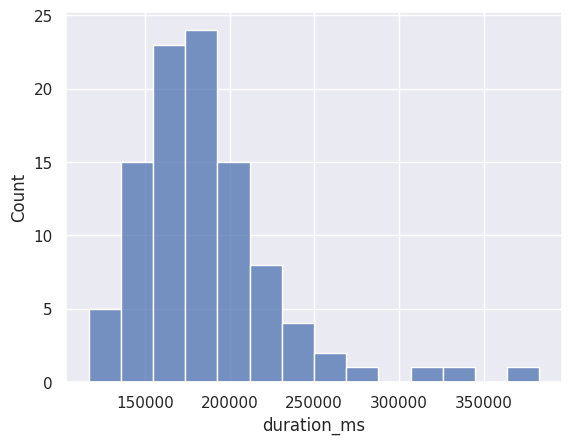

In [ ]:
# Filtrando as músicas com lançamento em 2021
_2021_songs = not_null[ not_null['release_date'].str.replace(' ', '').str.contains('2021') ]

# Listando as 100 músicas mais populares de 2021
_100_most_popular_songs = _2021_songs.sort_values(by='popularity', ascending=False).head(100)

df = _100_most_popular_songs['duration_ms']

# Gerando o histograma da distribuição da duração das músicas
sbn.set_theme(style="darkgrid")
sbn.histplot(df)

Um histograma é uma ferramenta clássica de visualização de dados, utilizada em diversas áreas. Sua estrutura representa a distribuição de uma ou mais variáveis, contando o número de ocorrências em intervalos específicos. O processamento de imagens exemplifica outras aplicações, como a equalização e o "histogram stretching", usados para ajustar o contraste da imagem. O "histogram stretching", também conhecido como expansão de histograma, é uma técnica que amplia a gama de intensidades de pixels em uma imagem, aumentando o contraste e revelando detalhes que poderiam estar obscurecidos. A análise do histograma das músicas revela que a maioria das canções populares possui duração entre 150.000 ms (2,5 minutos) e 200.000 ms (3,33 minutos). Ademais, o gráfico não segue uma distribuição normal, apresentando assimetria à esquerda, ou seja, com tendência a valores menores.

### 2 - Quais os gêneros de música predominantes entre os artistas que tem participação nas 100 música mais populares de 2021?

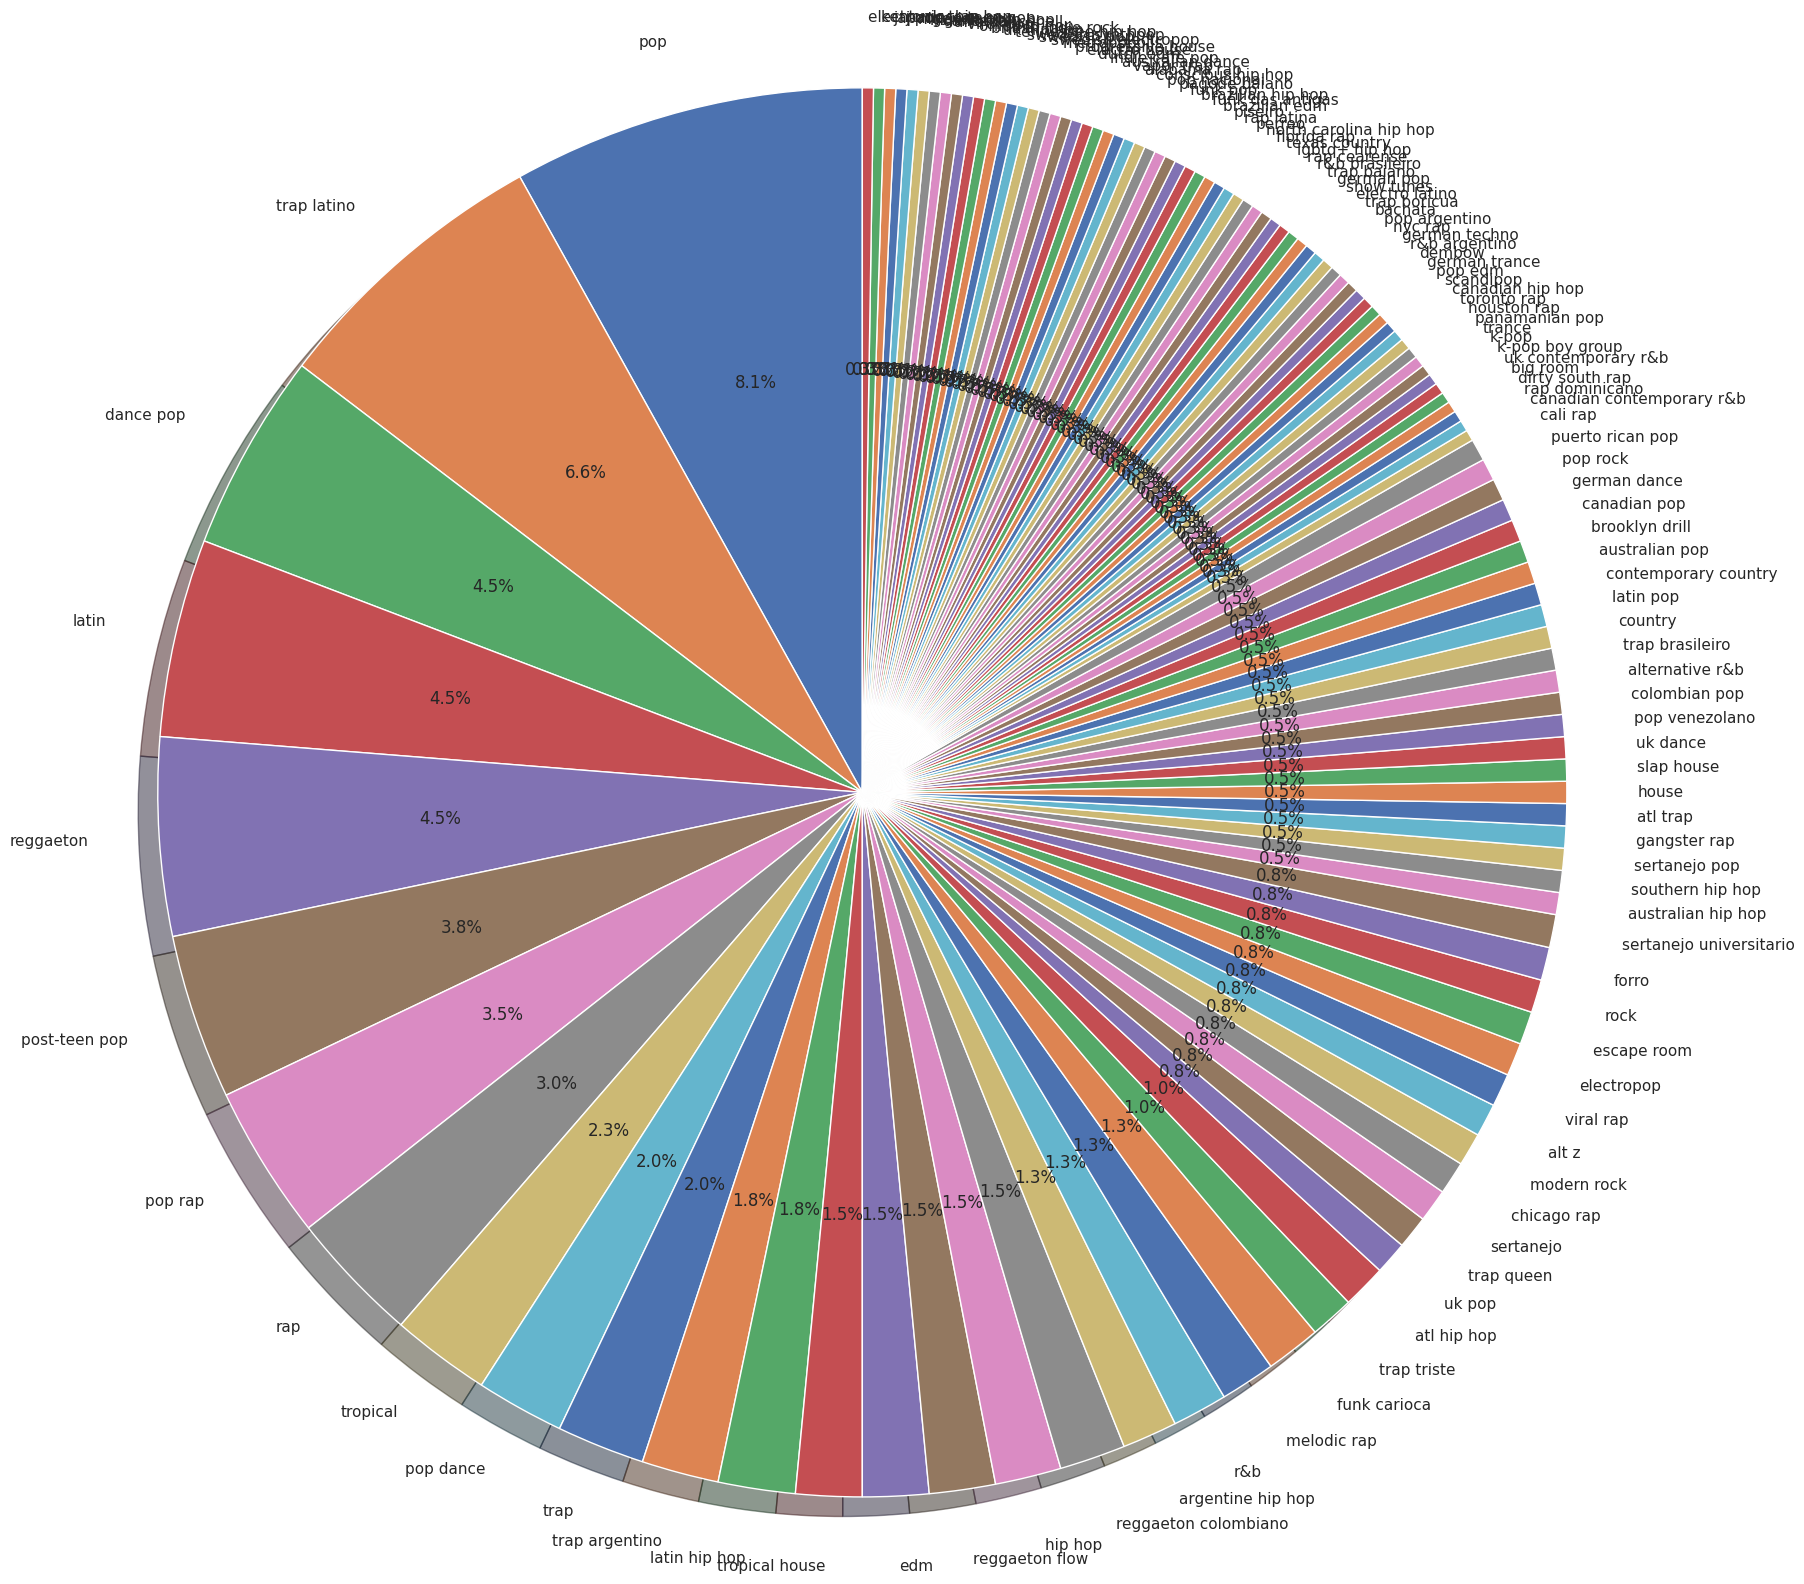

In [ ]:
# Filtrando as músicas com lançamento em 2021
# As datas podem conter somente o ano, além de outros formatos, sendo assim utilizo um contains para verificar se a música é de 2021
_2021_songs = not_null[ not_null['release_date'].str.replace(' ', '').str.contains('2021') ]

# Listando as 100 músicas mais populares de 2021
_100_most_popular_songs = _2021_songs.sort_values(by='popularity', ascending=False).head(100)

# Observação: Devido a coluna de artistas possuir como valores objetos do tipo vetor, tornou-se necessário
# processar os dados da seguinte forma

list_id_artists = []

# Obtendo o id dos artistas que participam nas 100 músicas mais populares
for row in _100_most_popular_songs['id_artist']:

    aux_list = row.replace('[', '').replace(']', '').replace("'", '').replace(' ', '').split(',')

    # Verificando para não incluir duplicados
    for i in range(0, len(aux_list)):
        it_found = False
        j = 0
        while j < len(list_id_artists) and it_found == False:
            if aux_list[i] == list_id_artists[j]:
                it_found = True
            j+=1
        if it_found == False:
            list_id_artists.append(aux_list[i])

genre_list = []

# Obtendo os gêneros de música dos dos artistas (Como são para artistas únicos estes podem se repetir)
for i in range(0, len(list_id_artists)):
    for row in artist_popularity_metrics[artist_popularity_metrics['id_artist'].replace(' ', '') == list_id_artists[i]]['genres']:
        aux_list = row.replace('[', '').replace(']', '').replace("'", '').split(',')

        for j  in range(0, len(aux_list)):
            if aux_list[j].replace(' ', '') != '':
                genre_list.append(aux_list[j].strip())

df_genre = pd.DataFrame(genre_list)

df_genre2 = df_genre.value_counts().sort_values(ascending=False)
labels = pd.unique(pd.Series(genre_list))

aux_list_dataframe = []

# Definindo a lista resultante (definindo labels e valores)
for i in range(0, len(labels)):
    aux_list_dataframe.append([labels[i], df_genre2[labels[i]]])

df_result = pd.DataFrame(aux_list_dataframe, columns=['name', 'value'])
df_result = df_result.sort_values(by='value', ascending=False)

plt.rcParams['figure.figsize'] = [20, 20]
fig1, ax1 = plt.subplots()
ax1.pie(df_result['value'], labels=df_result['name'], autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

O gráfico de pizza, também conhecido como gráfico de torta ou gráfico de setores, é um tipo de gráfico onde a área de cada setor representa a proporção da respectiva frequência. O gráfico demonstra a proporção de cada gênero musical entre os artistas nas 100 músicas mais populares de 2021. A análise da popularidade de gêneros musicais é crucial para a indústria, pois auxilia gravadoras, produtores e artistas a entenderem as tendências do mercado, identificar o público-alvo e direcionar estratégias de marketing e produção. Os três gêneros mais frequentes são pop (8,1%), trap latino (6,6%) e reggaeton (4,5%)."

Até este ponto vimos que o conjunto de dados contém mais de 586.000 músicas, coletadas a partir da API do Spotify. Os recursos incluem, música, artista, data de lançamento, bem como algumas características da música, como, acústico, dançante, volume, andamento e assim por diante. A fim de reduzir a carga de processamento dos códigos que sucedem este comentário iremos eliminar algumas colunas do nosso dataframe e podemos fazê-lo através da chamada do método drop, como mostrado na célula a seguir.

In [ ]:
new_df = not_null.copy()
new_df.drop([ 'id', 'explicit', 'key', 'mode'], axis = 1, inplace = True)
new_df.head()

,name,popularity,duration_ms,artists,id_artist,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Carve,6,126903,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,Capítulo 2.16 - Banquero Anarquista,0,98200,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,Vivo para Quererte - Remasterizado,0,181640,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,El Prisionero - Remasterizado,0,176907,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,Lady of the Evening,0,163080,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,-16.900,0.0390,0.989,0.1300,0.311,0.196,103.220,4


### 3 - Analise se há correlação (similaridade) entre a coluna "danceability" e a coluna "valence"?

O conjunto de dados inclui diversas métricas. Algumas delas deixam evidente seu significado, como ritmo, volume, energia, acústica, vivacidade, fala e podem ser relevantes na análise de dados. À primeira vista, as colunas "danceability" e "valence" parecem estar relacionadas, pois a "valence" é uma medida que descreve a positividade musical transmitida ao ouvinte, sendo assim, podemos deduzir que a positividade pode influenciar na decisão dos ouvintes quanto a dançar ou não uma determinada música. A fim de analisar a relação entre as colunas do dataframe, utilizaremos o método DataFrame.corr(), este nos fornece um conjunto de medidas que definem o nível de correlação entre as colunas. O código apresentado a seguir explora essa funcionalidade e apresenta os resultados de uma forma mais adequada.

<Axes: >

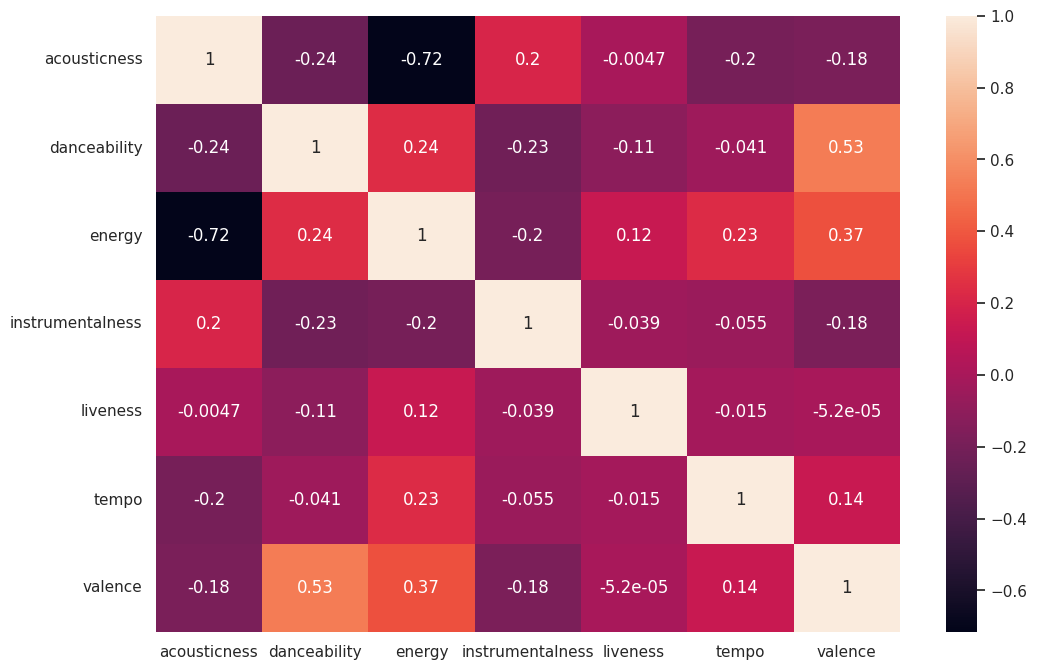

In [ ]:
corr = new_df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'tempo', 'valence']].corr()
sbn.set(style='darkgrid')
plt.figure(figsize=(12,8))
sbn.heatmap(corr, annot=True)

O Heatmap, ou mapa de calor, é uma ferramenta de visualização de dados que utiliza cores para representar a magnitude de valores em uma matriz. Essa técnica é amplamente utilizada em diversas áreas, como análise de correlações, estudos genéticos, análise de tráfego web e visualização de dados climáticos. Ele facilita a identificação de padrões e tendências, tornando grandes conjuntos de dados mais compreensíveis.

Neste contexto, o Heatmap foi utilizado para representar visualmente as correlações entre diferentes variáveis de um DataFrame, facilitando a interpretação das informações. A barra lateral direita indica a escala de valores, onde cores mais claras ou quentes representam valores positivos, e cores mais escuras ou frias, valores negativos. A visualização revela uma correlação positiva de 0,57 entre "danceability" e "valence". Correlações positivas próximas de 0,5 também são observadas entre "danceability" e "energy", bem como entre "acousticness" e "instrumentalness". Em contraste, "energy" e "acousticness" apresentam uma correlação negativa de -0,77, indicando uma forte relação inversa.

### 4 - Apresente os artistas que produzem músicas tanto enérgicas (energy) quanto acústicas (acousticness), levando em conta que um artista nesta categoria deva ter um valor médio para ambas as colunas de 0.5 ou superior.

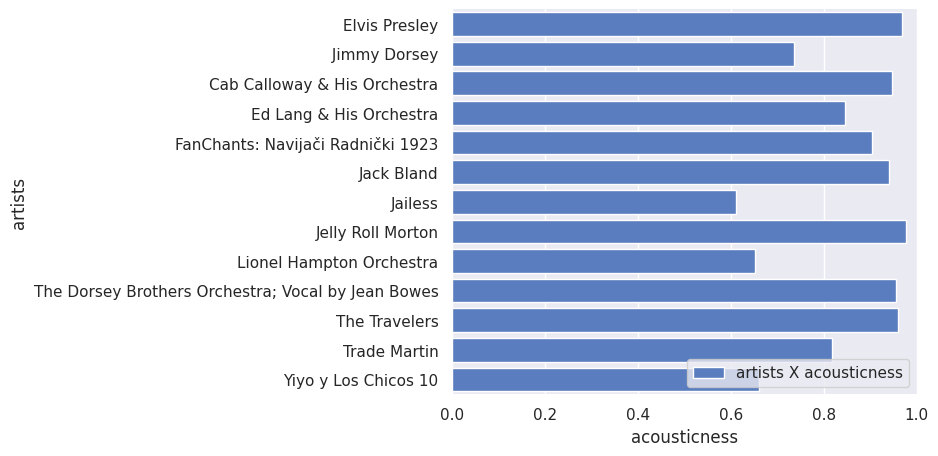

In [ ]:
list_data = []

aux_df = new_df[['artists','energy','acousticness']]

# Observação:
# A coluna **"artists"** apresenta vetores em seus registros, o que tornou necessário o desmembramento desses valores para garantir a precisão dos resultados. No entanto, devido ao grande volume de dados, uma enumeração completa de todos os valores da população mostrou-se inviável e extremamente demorada. Para contornar essa limitação, optamos por utilizar uma **amostra representativa dos dados**, garantindo um tamanho manejável e que possibilite uma análise fidedigna. Nos códigos, é possível observar o uso de comandos como `.head(X)`, onde **"X"** representa o tamanho da amostra utilizada.

aux_df = aux_df.head(3000)

for i in range(len(aux_df)):
    list_artists = aux_df.values[i][0].replace('[', '').replace(']', '').replace("'", '').split(',')
    for artist in list_artists:
        list_data.append([artist, aux_df.values[i][1], aux_df.values[i][2]])

df_result = pd.DataFrame(list_data, columns=['artists', 'energy', 'acousticness'])

aux_df = df_result.groupby('artists').mean()

aux_df = aux_df[aux_df['energy'] > 0.5]
aux_df = aux_df[aux_df['acousticness'] > 0.5]

new_df_list = []

for artist in aux_df.index.tolist():
    new_df_list.append([artist])

for i in range(len(aux_df)):
    new_df_list[i].append(str(aux_df.values[i][0]))
    new_df_list[i].append(str(aux_df.values[i][1]))

new_df_list = pd.DataFrame(new_df_list, columns=['artists', 'energy', 'acousticness'])

new_df_list['artists'] = new_df_list['artists'].astype("string")
new_df_list['energy'] = new_df_list['energy'].astype(float)
new_df_list['acousticness'] = new_df_list['acousticness'].astype(float)

f, ax = plt.subplots(figsize=(6, 5))

sbn.set_color_codes("muted")
sbn.barplot(x="acousticness", y="artists", data=new_df_list,
            label="artists X acousticness", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="artists",
       xlabel="acousticness")
sbn.despine(left=True, bottom=True)

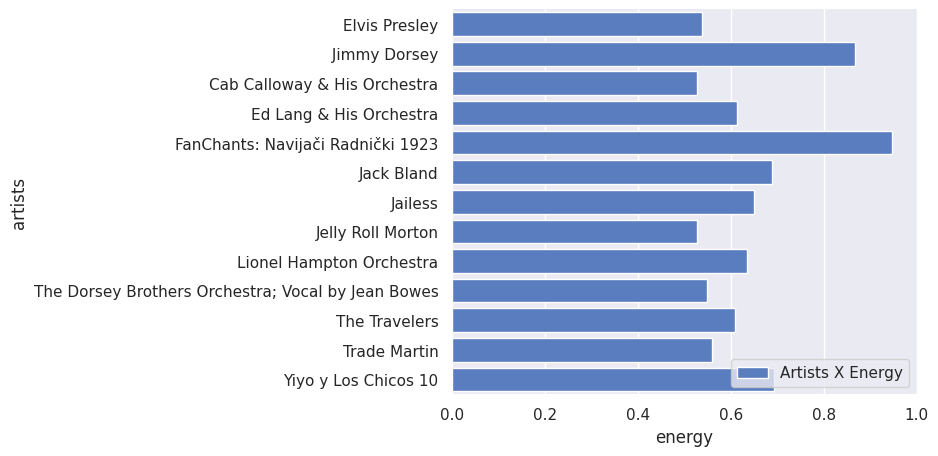

In [ ]:
f, ax = plt.subplots(figsize=(6, 5))
sbn.set_color_codes("muted")
sbn.barplot(x="energy", y="artists", data=new_df_list,
            label="Artists X Energy", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="artists",
       xlabel="energy")
sbn.despine(left=True, bottom=True)

Músicas com alta energia ("energy") caracterizam-se por batidas vigorosas, ritmos intensos e andamentos rápidos, enquanto músicas acústicas ("acousticness") apresentam melodias suaves, instrumentos acústicos e andamentos lentos. Observa-se que esses estilos apresentam características opostas. A capacidade de transitar entre esses estilos contrastantes é incomum entre os artistas. Os dados revelam que artistas que produzem predominantemente músicas com alta energia tendem a apresentar menor produção de músicas acústicas. No entanto, identificamos, por meio de filtragem, artistas que demonstram versatilidade e talento ao compor, produzir ou interpretar músicas com estilos rítmicos distintos. Essa versatilidade é valiosa, pois permite aos artistas explorar diferentes sonoridades e alcançar públicos diversos.

### 5 - Visão geral das tendências musicais entre os anos de 1940 e 2021.

Note que a coluna ***release_date*** está formata com a data completa, ***ex.: 1900-01-01***. Porém, a análise será realizada entre a média das características musicais por ano. Com isto, iremos formatar a data de tal forma a manter somente o ano (um valor inteiro).

In [ ]:
df_6 = new_df.copy()

# Observação:
# A coluna **"artists"** apresenta vetores em seus registros, o que tornou necessário o desmembramento desses valores para garantir a precisão dos resultados. No entanto, devido ao grande volume de dados, uma enumeração completa de todos os valores da população mostrou-se inviável e extremamente demorada. Para contornar essa limitação, optamos por utilizar uma **amostra representativa dos dados**, garantindo um tamanho manejável e que possibilite uma análise fidedigna. Nos códigos, é possível observar o uso de comandos como `.head(X)`, onde **"X"** representa o tamanho da amostra utilizada.

df_6['release_date'] = pd.to_datetime(df_6['release_date'], errors='coerce')
df_6['release_date'] = df_6['release_date'].dt.strftime('%Y')

df_6['release_date'] = df_6['release_date'].astype(int)

df_6 = df_6[df_6['release_date'] >= 1939]

year_avg = df_6[['danceability','energy','liveness','acousticness', 'valence','release_date']].groupby('release_date').mean().sort_values(by='release_date')

print(year_avg.head())

# Obtivemos os valores médios anuais para cinco medidas diferentes.
# Agora vou criar um figure e adicionar uma linha para cada tendência/característica acima.
plt.figure(figsize=(14,8))
plt.title("Tendências da música ao longo do tempo", fontsize=15)
lines = ['danceability','energy','liveness','acousticness','valence']
for line in lines:
    ax = sbn.lineplot(x='release_date', y=line, data=year_avg)
plt.legend(lines)

plt.show()

As tendências musicais refletem as mudanças sociais, culturais e tecnológicas ao longo das décadas. A partir dos dados apresentados, observamos que o estilo "acousticness" foi popular por volta dos anos 40, mas sofreu um declínio acentuado a partir de 1960, persistindo até hoje. Em contraste, o estilo "energy" não era popular entre o início dos anos 40 e meados dos anos 60, mas ganhou popularidade a partir de 1960, mantendo-se em evidência até hoje. É interessante notar que as tendências musicais refletem a "moda", com o aumento da produção de músicas que correspondem às preferências dos ouvintes. Isso indica que as gravadoras e produtores priorizam a produção de artistas e músicas que se alinham às tendências de mercado, buscando atender à demanda do público.

### 6 - Artistas, vamos ver os 10 principais artistas com mais músicas no conjunto de dados.

Alguns deles produzem muitas canções, enquanto há alguns artistas com pouquíssimas.
a) Vamos ver os 10 principais artistas com mais músicas no conjunto de dados.

<Axes: xlabel='release_date', ylabel='count'>

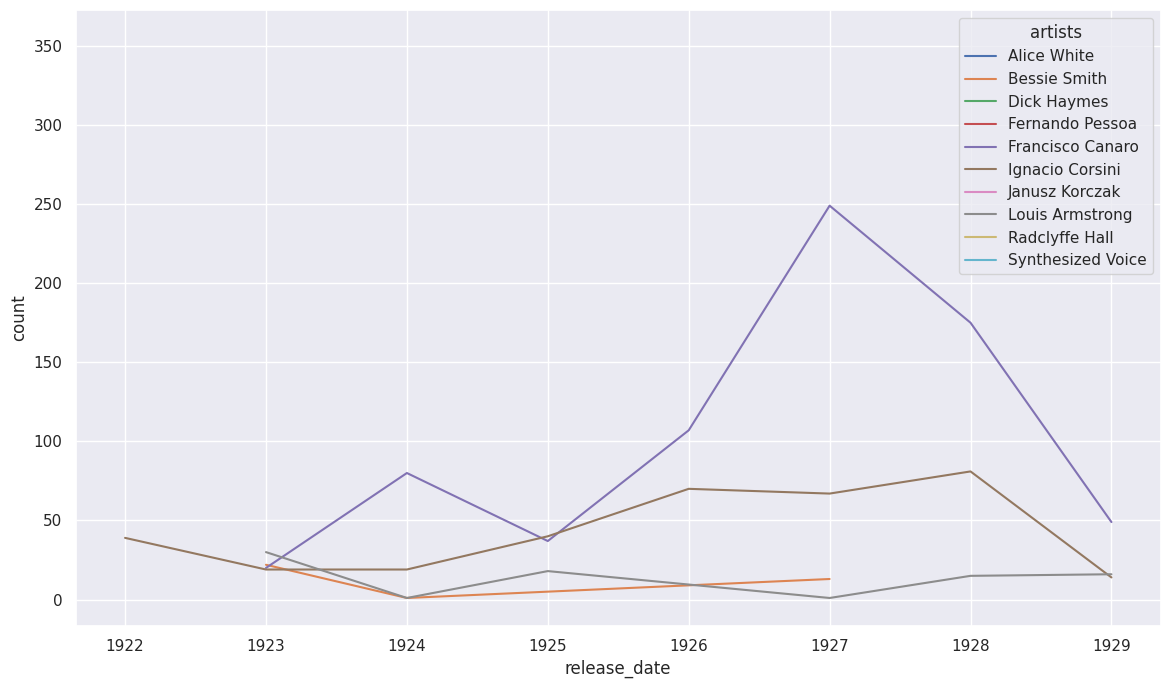

In [ ]:
df_7 = new_df.copy()

# Observação:
# A coluna **"artists"** apresenta vetores em seus registros, o que tornou necessário o desmembramento desses valores para garantir a precisão dos resultados. No entanto, devido ao grande volume de dados, uma enumeração completa de todos os valores da população mostrou-se inviável e extremamente demorada. Para contornar essa limitação, optamos por utilizar uma **amostra representativa dos dados**, garantindo um tamanho manejável e que possibilite uma análise fidedigna. Nos códigos, é possível observar o uso de comandos como `.head(X)`, onde **"X"** representa o tamanho da amostra utilizada.

df_7 = df_7.head(5000)

list_data = []

for i in range(len(df_7)):

    list_artists = df_7.values[i][3].replace('[', '').replace(']', '').replace("'", '').split(',')

    for artist in list_artists:

        name = artist.replace('"', '').replace("'", '').strip()

        if (name == 'Janusz Korczak' or name == 'Radclyffe Hall' or name == 'Alice White' or name == 'Synthesized Voice'
            or name == 'Francisco Canaro' or name == 'Fernando Pessoa' or name == 'Ignacio Corsini'
               or name == 'Louis Armstrong' or name == 'Bessie Smith' or name == 'Dick Haymes'):
            list_data.append([name, int(df_7.values[i][5].split('-')[0]), name])

df_7 = pd.DataFrame(list_data, columns=['artists', 'release_date', 'aux_artists'])

df_7['artists'] = df_7['artists'].astype('string')
df_7['aux_artists'] = df_7['aux_artists'].astype('string')

df_7 = df_7.groupby(['artists', 'release_date']).count()

new_df_list = []

for values in df_7.index.tolist():
    new_df_list.append([values[0], values[1]])

for i in range(len(df_7)):
    new_df_list[i].append(str(df_7.values[i][0]))

new_df_list = pd.DataFrame(new_df_list, columns=['artists', 'release_date', 'count'])

new_df_list['artists'] = new_df_list['artists'].astype('string')
new_df_list['count'] = new_df_list['count'].astype(int)

# new_df_list.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(14, 8))
sbn.lineplot(x='release_date', y='count', hue='artists', data=new_df_list)

Demonstramos a partir do tratamento/desmebramento da coluna "artists" os 10 artistas com mais produções na nossa amostra.

## Extra:
A análise individualizada dos artistas na coluna "artists" do conjunto de dados do Spotify apresenta desafios significativos devido à sua complexidade e ao alto custo computacional do processamento necessário. Com mais de 580.000 registros e uma vasta quantidade de artistas, a desagregação e o tratamento individualizado desses dados tornam-se inviáveis. No entanto, apresentamos uma proposta para o tratamento das informações do conjunto de dados. Propomos a criação de um gráfico animado que demonstre a evolução anual da produção musical dos 10 artistas mais prolíficos no período de 1900 a 2021, com base na coluna "release_date". A técnica consiste em acumular os dados em um novo DataFrame, permitindo a animação de um gráfico de colunas que ilustra a produção anual de cada artista. A principal motivação para o registro deste exercício foi o desenvolvimento do gráfico animado, conforme demonstrado a seguir. Essa visualização dinâmica permite identificar padrões e tendências na produção musical ao longo do tempo, oferecendo insights valiosos sobre a trajetória dos artistas mais influentes.

In [ ]:
df = new_df.copy()

print(pd.Series(df["artists"].nunique()))

# Existem 114030 artistas em todo o conjunto de dados.
# Alguns deles produzem muitas canções, enquanto há alguns artistas com pouquíssimas.
# a) Vamos ver os 10 principais artistas com mais músicas no conjunto de dados.

# b) Podemos criar um novo dataframe que mostra a produção anual de canções para esses 10 artistas
# Primeiro criamos uma lista usando o índice retornado pela função value_counts

artist_list = df.artists.value_counts().index[:10]

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_date'] = df['release_date'].dt.strftime('%Y').astype(int)

# Agora filtro  no dataframe usando esta lista e agrupando por ano:
df_artists = df[df.artists.isin(artist_list)][['artists','release_date','energy']].groupby(['artists','release_date']).count().reset_index()
df_artists.rename(columns={'energy':'song_count'}, inplace=True)

# Este dataframe contém o nome do artista, ano e quantas músicas o artista produziu naquele ano.
# Agora vou criar um gráfico de linha comparando as produções desses artistas.

plt.figure(figsize=(16,8))
sbn.lineplot(x='release_date', y='song_count', hue='artists', data=df_artists)
plt.show()

# Não podemos realmente separar as linhas. Por ser um período tão longo (100 anos), os artistas aparecem em apenas uma parte de toda a linha do tempo.
# Verificarei quais artistas estão dominando em cada ano.
#
# Primeiro, vou criar um dataframe vazio que contém toda a linha do tempo (1900-2021) e os nomes dos 10 principais artistas.

df1 = pd.DataFrame(np.zeros((121,10)), columns=artist_list)
df1['release_date'] = np.arange(1900,2021)
#Converter as datas em int para realizar o merge com o mesmo tipo de dado
df1['release_date'] = df1['release_date'].astype(int)

# O dataframe inclui 121 linhas para 121 anos e 11 colunas (10 artistas e uma coluna de ano).

df1 = df1.melt(id_vars='release_date',var_name='artists', value_name='song_count')

# A contagem de músicas é zero em todos os anos. Vou mesclar contagens de músicas do dataframe df_artists usando a função merge
df_merge = pd.merge(df1, df_artists, on=['release_date','artists'], how='outer').sort_values(by='release_date').reset_index(drop=True)

#Substituirei os valores NaN por 0 e eliminarei a coluna song_count_x.
df_merge.fillna(0, inplace=True)
df_merge.drop('song_count_x', axis=1, inplace=True)
df_merge.rename(columns={'song_count_y':'song_count'}, inplace=True)

# Também quero adicionar uma coluna que mostra a soma cumulativa das
# Músicas que cada artista produziu ao longo dos anos. Uma maneira de fazer isso é usar as funções groupby e cumsum.
df_merge['cumsum'] = df_merge[['song_count','artists']].groupby('artists').cumsum()
df_merge.head(10)

fig = px.bar(df_merge,
             x='artists', y='cumsum',
             color='artists',
             animation_frame='release_date', animation_group='release_date',
             range_y=[0,5000],
             title='Artistas Com Mais Músicas Produzidas')
fig.show()